In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import brewer2mpl
import json
import sys
from scipy.spatial.distance import cdist
from scipy.spatial.distance import euclidean

%matplotlib inline

In [10]:
bmap = brewer2mpl.get_map("Set1", "qualitative", 7)                                                                                                                                                                                                                                                                          
colors = bmap.colors
Lcolors = colors[0:5]

for i in range(5):
    color = [i/255. for i in Lcolors[i]]
    Lcolors[i] = color

plt.rcParams['xtick.labelsize']= 20
plt.rcParams['ytick.labelsize']= 20
plt.rcParams["figure.figsize"] = (20,15)

In [11]:
def HausdorffScore(cfs1, cfs2):
    """
    compute the modified Hausdorff score for measuring the consistency between two sets of counterfactual explanations.
    Arguments:
        cfs1: the first set of counterfactual explanations.
        cfs2: the second set of counterfactual explanations.
    returns: 
        modified Hausdorff distance between two sets.
    """
    cfs1, cfs2 = np.array(cfs1), np.array(cfs2)
    pairwise_distance = cdist(cfs1, cfs2)
    h_A_B = pairwise_distance.min(1).mean()
    h_B_A = pairwise_distance.min(0).mean()

    return max(h_A_B, h_B_A)

def stat(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    
    distance = []
    proximity = []
    sparsity = []
    aps = []

    num = data['num']
    cfs = data['cf']
    for i in range(len(cfs)):
        cf_list = cfs[i]
        cf_data_list = []
        cf2_data_list = []
        for j in range(num[i]):
            cf = cf_list[j]
            cf_data_list.extend(cf['cf'])
            cf2_data_list.extend(cf['cf2'])
            proximity.append(cf['proximity'])
            sparsity.append(cf['sparsity'])
            aps.append(cf['aps'])

        distance.append(HausdorffScore(cf_data_list, cf2_data_list))

    return np.mean(distance), np.mean(proximity), np.mean(sparsity), np.mean(aps)

def stat_cfmss(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    
    distance = []
    proximity = []
    sparsity = []
    aps = []

    num = data['num']
    cfs = data['cf']
    cf2 = data['cf2']
    for i in range(len(cfs)):
        cf_list = cfs[i]
        cf_data_list = []
        for j in range(num[i]):
            cf = cf_list[j]
            cf_data_list.extend(cf['cf'])
            proximity.append(cf['proximity'])
            sparsity.append(cf['sparsity'])
            aps.append(cf['aps'])
        cf2_data_list = cf2[i]
        distance.append(HausdorffScore(cf_data_list, cf2_data_list))

    return np.mean(distance), np.mean(proximity), np.mean(sparsity), np.mean(aps)

In [12]:
synthetic_gs = "../cfgen/synthetic/synthetic_growingsphere.json"
synthetic_cfproto = "../cfgen/synthetic/synthetic_cfproto.json"
synthetic_plaincf = "../cfgen/synthetic/synthetic_plaincf.json"
synthetic_dice = "../cfgen/synthetic/synthetic_dice.json"
synthetic_cfmss = "../cfgen/synthetic/synthetic_cfmss.json"

syn_distance_gs, syn_proximity_gs, syn_sparsity_gs, syn_aps_gs = stat(synthetic_gs)
syn_distance_cfproto, syn_proximity_cfproto, syn_sparsity_cfproto, syn_aps_cfproto = stat(synthetic_cfproto)
syn_distance_plaincf, syn_proximity_plaincf, syn_sparsity_plaincf, syn_aps_plaincf = stat(synthetic_plaincf)
syn_distance_dice, syn_proximity_dice, syn_sparsity_dice, syn_aps_dice = stat(synthetic_dice)
syn_distance_cfmss, syn_proximity_cfmss, syn_sparsity_cfmss, syn_aps_cfmss = stat_cfmss(synthetic_cfmss)

In [13]:
thyroid_gs = "../cfgen/thyroid/thyroid_growingsphere.json"
thyroid_cfproto = "../cfgen/thyroid/Thyroid_cfproto.json"
thyroid_plaincf = "../cfgen/thyroid/thyroid_plaincf.json"
thyroid_dice = "../cfgen/thyroid/thyroid_dice.json"
thyroid_cfmss = "../cfgen/thyroid/thyroid_cfmss.json"

thyroid_distance_gs, thyroid_proximity_gs, thyroid_sparsity_gs, thyroid_aps_gs = stat(thyroid_gs)
thyroid_distance_cfproto, thyroid_proximity_cfproto, thyroid_sparsity_cfproto, thyroid_aps_cfproto = stat(thyroid_cfproto)
thyroid_distance_plaincf, thyroid_proximity_plaincf, thyroid_sparsity_plaincf, thyroid_aps_plaincf = stat(thyroid_plaincf)
thyroid_distance_dice, thyroid_proximity_dice, thyroid_sparsity_dice, thyroid_aps_dice = stat(thyroid_dice)
thyroid_distance_cfmss, thyroid_proximity_cfmss, thyroid_sparsity_cfmss, thyroid_aps_cfmss = stat_cfmss(thyroid_cfmss)

In [14]:
hepatitis_gs = "../cfgen/hepatitis/Hepatitis_growingsphere.json"
hepatitis_cfproto = "../cfgen/hepatitis/Hepatitis_cfproto.json"
hepatitis_plaincf = "../cfgen/hepatitis/Hepatitis_plaincf.json"
hepatitis_dice = "../cfgen/hepatitis/Hepatitis_dice.json"
hepatitis_cfmss = "../cfgen/hepatitis/Hepatitis_cfmss.json"


hepatitis_distance_gs, hepatitis_proximity_gs, hepatitis_sparsity_gs, hepatitis_aps_gs = stat(hepatitis_gs)
hepatitis_distance_cfproto, hepatitis_proximity_cfproto, hepatitis_sparsity_cfproto, hepatitis_aps_cfproto = stat(hepatitis_cfproto)
hepatitis_distance_plaincf, hepatitis_proximity_plaincf, hepatitis_sparsity_plaincf, hepatitis_aps_plaincf = stat(hepatitis_plaincf)
hepatitis_distance_dice, hepatitis_proximity_dice, hepatitis_sparsity_dice, hepatitis_aps_dice = stat(hepatitis_dice)
hepatitis_distance_cfmss, hepatitis_proximity_cfmss, hepatitis_sparsity_cfmss, hepatitis_aps_cfmss = stat_cfmss(hepatitis_cfmss)

In [15]:
xaxis_label = ["GS", "PlainCF", "DiCE","CFProto", "CFMSS"]
xtick = np.arange(5)

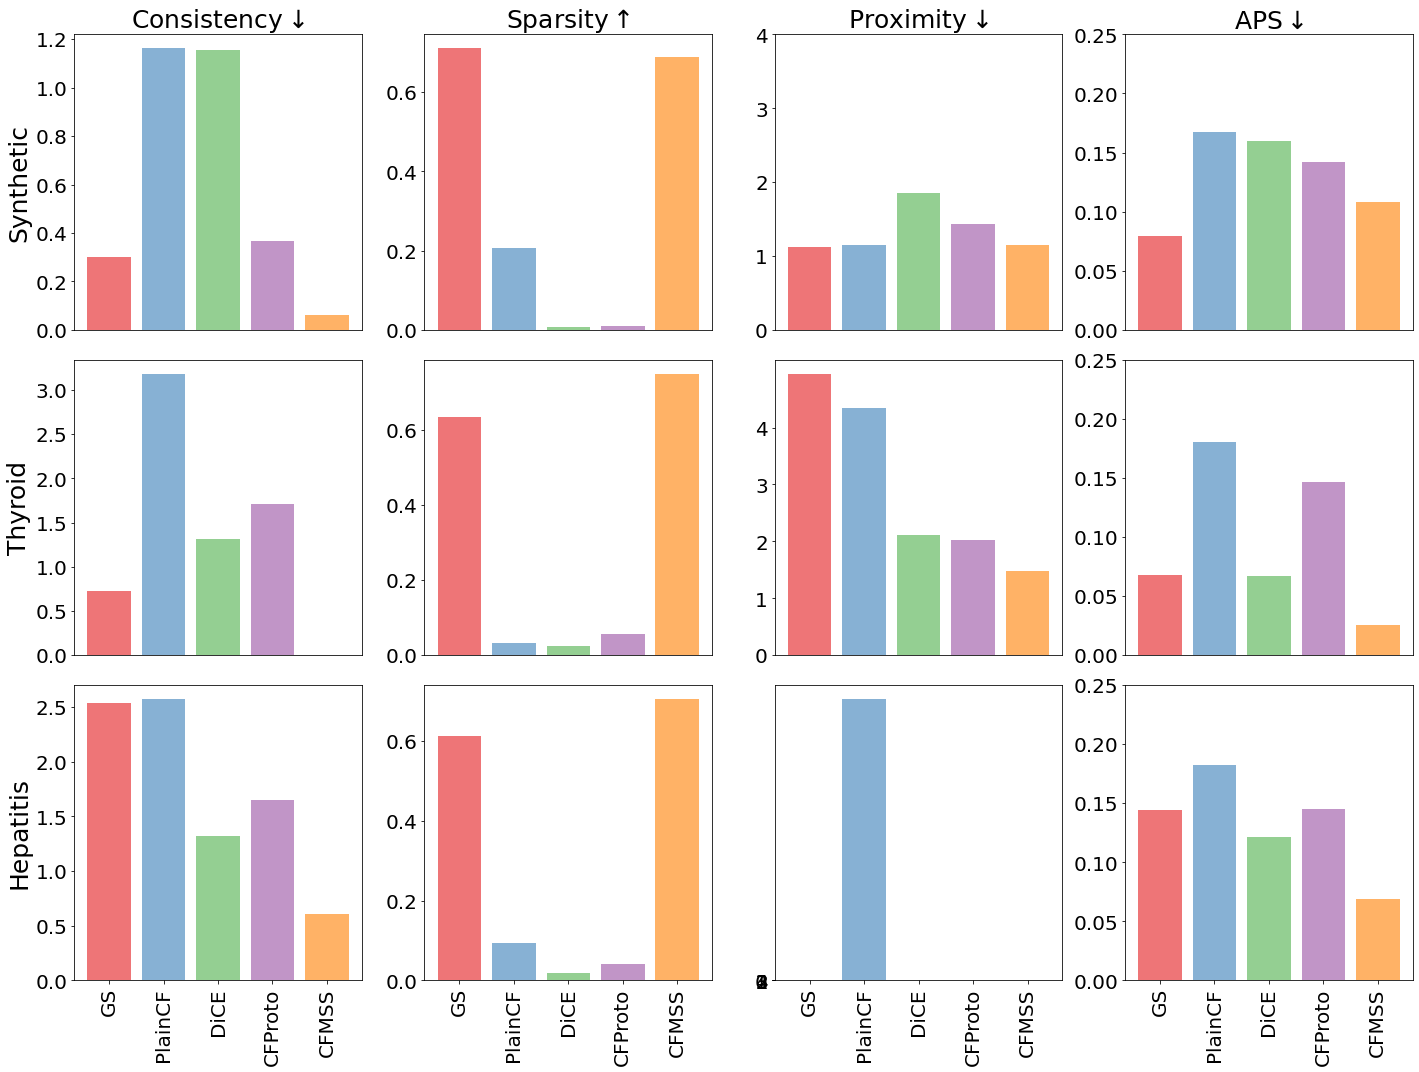

In [30]:
from matplotlib.ticker import FormatStrFormatter
fig, axs = plt.subplots(3, 4)

alpha = 0.6
fontsize = 25

axs[0, 0].bar(xtick,  [syn_distance_gs, syn_distance_plaincf, syn_distance_dice,  syn_distance_cfproto, syn_distance_cfmss], color=Lcolors, alpha = alpha)
axs[0, 1].bar(xtick,  [syn_sparsity_gs, syn_sparsity_plaincf, syn_sparsity_dice,  syn_sparsity_cfproto, syn_sparsity_cfmss], color=Lcolors, alpha = alpha)
axs[0, 2].bar(xtick,  [syn_proximity_gs, syn_proximity_plaincf, syn_proximity_dice,  syn_proximity_cfproto, syn_proximity_cfmss], color=Lcolors, alpha = alpha)
axs[0, 3].bar(xtick,  [syn_aps_gs, syn_aps_plaincf, syn_aps_dice,  syn_aps_cfproto, syn_aps_cfmss], color=Lcolors, alpha = alpha)

axs[1, 0].bar(xtick,  [thyroid_distance_gs, thyroid_distance_plaincf, thyroid_distance_dice,  thyroid_distance_cfproto, thyroid_distance_cfmss], color=Lcolors, alpha = alpha)
axs[1, 1].bar(xtick,  [thyroid_sparsity_gs, thyroid_sparsity_plaincf, thyroid_sparsity_dice,  thyroid_sparsity_cfproto, thyroid_sparsity_cfmss], color=Lcolors, alpha = alpha)
axs[1, 2].bar(xtick,  [thyroid_proximity_gs, thyroid_proximity_plaincf, thyroid_proximity_dice,  thyroid_proximity_cfproto, thyroid_proximity_cfmss], color=Lcolors, alpha = alpha)
axs[1, 3].bar(xtick,  [thyroid_aps_gs, thyroid_aps_plaincf, thyroid_aps_dice,  thyroid_aps_cfproto, thyroid_aps_cfmss], color=Lcolors, alpha = alpha)

axs[2, 0].bar(xtick,  [hepatitis_distance_gs, hepatitis_distance_plaincf, hepatitis_distance_dice,  hepatitis_distance_cfproto, hepatitis_distance_cfmss], color=Lcolors, alpha = alpha)
axs[2, 1].bar(xtick,  [hepatitis_sparsity_gs, hepatitis_sparsity_plaincf, hepatitis_sparsity_dice,  hepatitis_sparsity_cfproto, hepatitis_sparsity_cfmss], color=Lcolors, alpha = alpha)
axs[2, 2].bar(xtick,  [hepatitis_proximity_gs, hepatitis_proximity_plaincf, hepatitis_proximity_dice,  hepatitis_proximity_cfproto, hepatitis_proximity_cfmss], color=Lcolors, alpha = alpha)
axs[2, 3].bar(xtick,  [hepatitis_aps_gs, hepatitis_aps_plaincf, hepatitis_aps_dice,  hepatitis_aps_cfproto, hepatitis_aps_cfmss], color=Lcolors, alpha = alpha)


# Set Title
axs[0,0].set_title(r"Consistency$\downarrow$", fontsize = fontsize)
axs[0,1].set_title(r"Sparsity$\uparrow$", fontsize = fontsize)
axs[0,2].set_title(r"Proximity$\downarrow$", fontsize = fontsize)
axs[0,3].set_title(r"APS$\downarrow$", fontsize = fontsize)

# Set Y Label
axs[0,0].set_ylabel(r'Synthetic', fontsize = fontsize)
axs[1,0].set_ylabel(r'Thyroid', fontsize = fontsize)
axs[2,0].set_ylabel(r'Hepatitis', fontsize = fontsize)

# Set X tick
axs[0, 0].set_xticks([])
axs[0, 1].set_xticks([])
axs[0, 2].set_xticks([])
axs[0, 3].set_xticks([])
axs[1, 0].set_xticks([])
axs[1, 1].set_xticks([])
axs[1, 2].set_xticks([])
axs[1, 3].set_xticks([])

axs[2,0].set_xticks(xtick)
axs[2,0].set_xticklabels(xaxis_label, rotation = 90)
axs[2,1].set_xticks(xtick)
axs[2,1].set_xticklabels(xaxis_label, rotation = 90)
axs[2,2].set_xticks(xtick)
axs[2,2].set_xticklabels(xaxis_label, rotation = 90)
axs[2,3].set_xticks(xtick)
axs[2,3].set_xticklabels(xaxis_label, rotation = 90)

# Set Y limit
axs[0,1].set_yticks(np.arange(0, 0.7, 0.2))
axs[0,2].set_yticks(np.arange(0, 4.5, 1))
axs[0,3].set_yticks(np.arange(0, 0.27, 0.05))

axs[1,1].set_yticks(np.arange(0, 0.7, 0.2))
axs[1,2].set_yticks(np.arange(0, 4.5, 1))
axs[1,3].set_yticks(np.arange(0, 0.27, 0.05))

axs[2,1].set_yticks(np.arange(0, 0.7, 0.2))
axs[2,2].set_yticks(np.arange(0, 4.5, 1.0))
axs[2,3].set_yticks(np.arange(0, 0.27, 0.05))

axs[0, 3].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[1, 3].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[2, 3].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))


plt.tight_layout()
plt.savefig("experiments.pdf", dpi = 1200, bbox_inches = 'tight')
plt.show()

In [31]:
hepatitis_proximity_plaincf

33623.40250878423